# New Measure - abasaglar

## Rationale

## Proposed Measure

**Title**: 

**Description**: 

**Why It Matters**: 

### Numerators and Denominators

## SQL and results

In [2]:
#import libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps

In [8]:
#obtain AAF and EHF data from BQ, using measures.cpma_products as reference list

sql = """
SELECT
  rx.month,
  rx.pct,
  SUM(CASE
      WHEN substr(rx.bnf_code,10,2) IN ('AA','BB') THEN items --calculate glargine items
      ELSE 0 END) AS glarg_items,
  IEEE_DIVIDE(SUM(CASE
      WHEN substr(rx.bnf_code,10,2) IN ('AA','BB') THEN items
        ELSE 0 END), SUM(items)) AS glar_percent_items   -- calculate glargine items proportion
FROM
  hscic.normalised_prescribing_standard AS rx
  join
  hscic.ccgs as ccgs
  on
  ccgs.code=rx.pct
WHERE
(bnf_code like '0601012V0%' and bnf_code not like '0601012V0%AE')
and ccgs.org_type = 'CCG'
and month >='2015-10-01'
GROUP BY
  month,
  pct
ORDER BY
  month
"""
glar_df = bq.cached_read(sql, csv_path='glar_df.csv', use_cache=False)
glar_df['month'] = glar_df['month'].astype('datetime64[ns]')



This shows a considerable decrease, particularly in last 18 months.  *CHECK bnf_codes in case of change*

## Modelling for measure

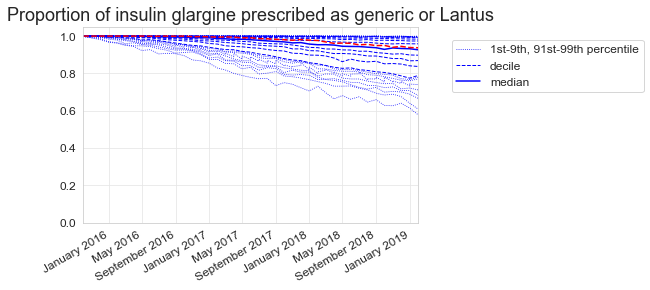

In [9]:
#create sample deciles

charts.deciles_chart(
        glar_df,
        period_column='month',
        column='glar_percent_items',
        title="Proportion of insulin glargine prescribed as generic or Lantus",
        show_outer_percentiles=True)

#add in example CCG (NEW Devon - 99P)
df_subject = glar_df.loc[glar_df['pct'] == '99P']
plt.plot(df_subject['month'], df_subject['glar_percent_items'], 'r--')
plt.show()

There is significant use in some CCGs.

C:\Users\racro\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


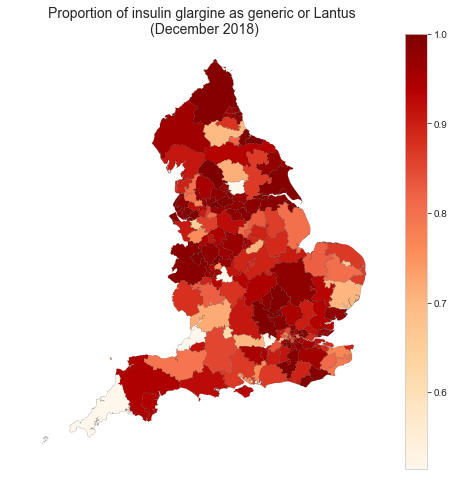

In [10]:
#create choropeth map of AAF proportion
latest_glar_df = glar_df.loc[glar_df['month'] == '2018-12-01']
plt = maps.ccg_map(latest_glar_df, title="Proportion of insulin glargine as generic or Lantus \n(December 2018)", column='glar_percent_items', cartogram=False)
plt.show()